In [1]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch
from cmehr.utils.file_utils import load_pkl
from cmehr.models.common.model_PANTHER import PANTHER, PrototypeTokenizer

In [2]:
file_path = "/home/fywang/Documents/EHR_codebase/MMMSPG/prototype_results/mimic4_pretrain/self_supervised_embs.pkl"
data_dict = load_pkl(file_path)

In [4]:
# prototype_file = "/home/fywang/Documents/EHR_codebase/MMMSPG/prototype_results/mimic4_pretrain/ts_proto_16.pkl"
# prototypes = load_pkl(prototype_file)
# model = PANTHER(proto_path=prototype_file, out_size=16)

In [5]:
# prototypes["prototypes"]

In [6]:
data_dict.keys()

dict_keys(['train_ts_embs', 'train_cxr_embs'])

In [8]:
train_ts_emb = torch.from_numpy(data_dict["train_ts_embs"])
# test_ts_emb = torch.from_numpy(data_dict["test_ts_embs"])

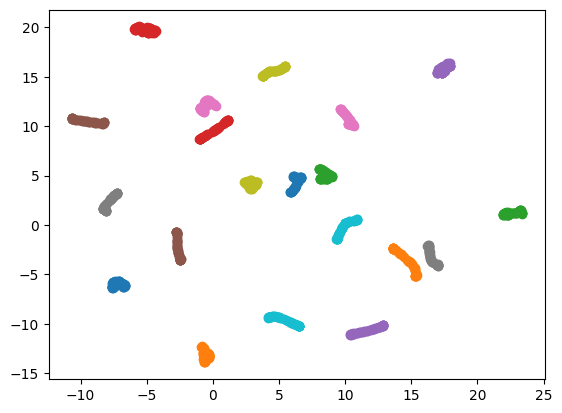

In [12]:
# visualize xxx
import umap
from einops import rearrange
sample_data = train_ts_emb[:20]
# flatten_data = sample_data.view(sample_data.size(0), -1).numpy()
flatten_data = rearrange(sample_data, 'b n c -> (b n) c').numpy()
reducer = umap.UMAP()
embedding = reducer.fit_transform(flatten_data)
sample_embedding = embedding.reshape(20, 48, 2)
for i in range(20):
    plt.scatter(sample_embedding[i, :, 0], sample_embedding[i, :, 1])

In [39]:
### get PANTHER representation and GMM mixtures
with torch.inference_mode():
    out_dict = model.representation(train_ts_emb[1].unsqueeze(dim=0))
    out = out_dict["repr"]
    qqs = out_dict["qq"]
    tokenizer = PrototypeTokenizer(p=16)
    mus, pis, sigmas = tokenizer.forward(out)
    mus = mus[0].detach().cpu().numpy()
    qq = qqs[0,:,:,0].cpu().numpy()
    global_cluster_labels = qq.argmax(axis=1)

<Axes: >

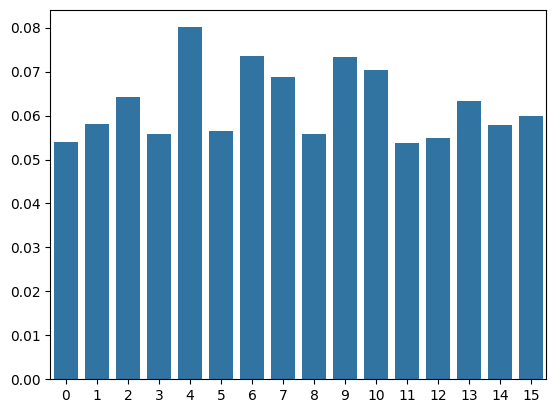

In [40]:
sns.barplot(mus)

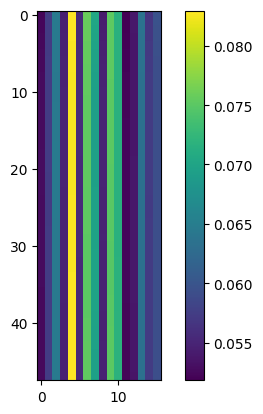

In [41]:
plt.imshow(qq[:48])

plt.colorbar()

In [46]:
qq[:, 2]

array([0.0646755 , 0.06460695, 0.0645498 , 0.06450205, 0.06445973,
       0.06442286, 0.06439141, 0.06436636, 0.0643482 , 0.06433789,
       0.0643374 , 0.06434771, 0.06436784, 0.06439387, 0.06441992,
       0.06444401, 0.06446613, 0.06448925, 0.06450943, 0.06452173,
       0.06452616, 0.06452567, 0.0645242 , 0.0645237 , 0.06451878,
       0.064505  , 0.06447892, 0.06444695, 0.06442237, 0.06440714,
       0.06439976, 0.06439682, 0.06439535, 0.0643924 , 0.06438994,
       0.06439141, 0.06440075, 0.06441697, 0.06444007, 0.06446663,
       0.06449417, 0.06451681, 0.06453158, 0.06453798, 0.06453896,
       0.06453601, 0.06453207, 0.06452961, 0.06452862, 0.06453207,
       0.06454044, 0.06455374, 0.0645695 , 0.06458527, 0.06459709,
       0.06460005, 0.06459069, 0.0645695 , 0.06453847, 0.06450647,
       0.06448187, 0.06447203, 0.06447941, 0.06450254, 0.06453256,
       0.06456063, 0.06457245, 0.06456359, 0.06454044, 0.0645114 ,
       0.06448236, 0.06445531, 0.06442975, 0.06440763, 0.06439